In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df=pd.read_csv('churn_prediction.csv')
df

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [291]:
df.shape

(10000, 14)

In [292]:
df.describe()

,Row,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row          10000 non-null  int64  
 1   Id           10000 non-null  int64  
 2   Surname      10000 non-null  object 
 3   Score        10000 non-null  int64  
 4   Nationality  10000 non-null  object 
 5   Gender       10000 non-null  object 
 6   Age          10000 non-null  int64  
 7   Tenure       10000 non-null  int64  
 8   Balance      10000 non-null  float64
 9   Products     10000 non-null  int64  
 10  Card         10000 non-null  int64  
 11  Active       10000 non-null  int64  
 12  Salary       10000 non-null  float64
 13  Exited       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [294]:
df.isna().sum()

Row            0
Id             0
Surname        0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

__Exploratory Data Analysis__

In [295]:
df['Nationality'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [296]:
print('There are {} customers from France'.format(len(df[df['Nationality']=='France'])))
print('There are {} customers from Spain'.format(len(df[df['Nationality']=='Spain'])))
print('There are {} customers from Germany'.format(len(df[df['Nationality']=='Germany'])))

There are 5014 customers from France
There are 2477 customers from Spain
There are 2509 customers from Germany


This service has most of its customers being of French nationality

In [297]:
print('There are {} female customers'.format(len(df[df['Gender']=='Female'])))
print('There are {} male customers'.format(len(df[df['Gender']=='Male'])))

There are 4543 female customers
There are 5457 male customers


In [298]:
print('The churn rate is {} %'.format(len(df[df['Exited']==1])/len(df) *100))

The churn rate is 20.369999999999997 %


This means that about 2000 customers left the service during the period in question

In [299]:
df_exited=df[df['Exited']==1]
df_exited.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


<AxesSubplot:>

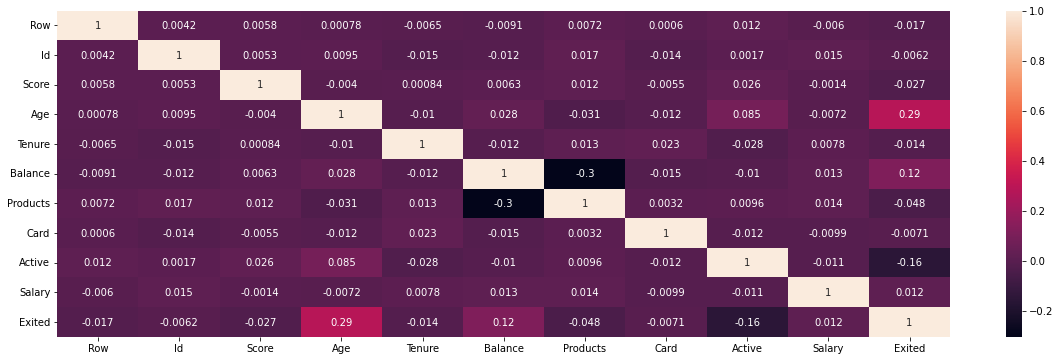

In [300]:
plt.figure(figsize=(20,6))
sns.heatmap(data=df.corr(), annot=True)

In [301]:
print('Out of the exited customers, {}% are females'.format(len(df_exited[df_exited['Gender']=='Female'])/len(df_exited)*100))
print('Out of the exited customers, {}% are males'.format(len(df_exited[df_exited['Gender']=='Male'])/len(df_exited)*100))

Out of the exited customers, 55.91556210112911% are females
Out of the exited customers, 44.08443789887089% are males


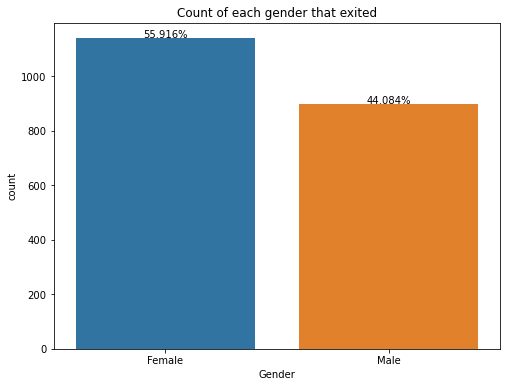

In [302]:
plt.figure(figsize=(8,6))
gend=sns.countplot(x='Gender', data=df_exited)
for g in gend.patches:
    height=g.get_height()
    gend.text(g.get_x()+g.get_width()/2., height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of each gender that exited')
plt.xlabel('Gender')
plt.show()

In [303]:
df_exited['Age'].unique()

array([42, 44, 29, 58, 38, 39, 45, 51, 49, 27, 41, 66, 32, 22, 46, 65, 35,
       28, 31, 52, 56, 48, 57, 24, 55, 50, 47, 43, 54, 33, 67, 40, 34, 62,
       30, 61, 60, 37, 59, 53, 25, 36, 63, 69, 64, 21, 23, 73, 20, 26, 18,
       71, 74, 84, 70, 19, 68, 72], dtype=int64)

In [304]:
print('The median age of the churned customers is {} years'. format(df_exited['Age'].median()))

The median age of the churned customers is 45.0 years


C:\Users\JESSICA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


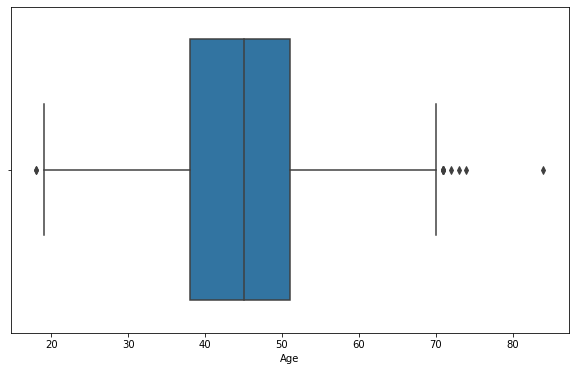

In [305]:
plt.figure(figsize=(10,6))
sns.boxplot(df_exited['Age'])
plt.show()

Text(0.5, 1.0, 'Histogram of age distribution')

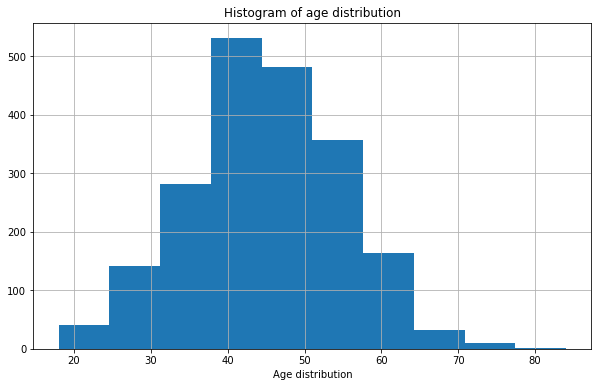

In [306]:
df_exited['Age'].hist(figsize=(10,6))
plt.xlabel('Age distribution')
plt.title('Histogram of age distribution')

From the distribution, we can see that the age of the customers with the highest churn are between about 38-44 years. The age feature is also seen to be normally distributed.

Text(0.5, 1.0, 'Balance distribution of churned customers')

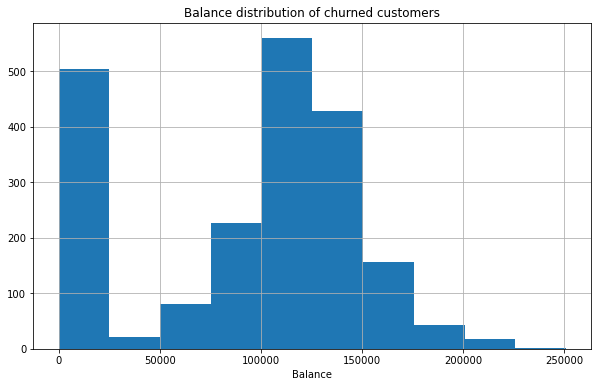

In [307]:
plt.figure(figsize=(10,6))
df_exited['Balance'].hist()
plt.xlabel('Balance')
plt.title('Balance distribution of churned customers')

From the plot, we can see that most customers had a balance between 100000 and 125000 and also between 0 and 25000 before exiting the service. 

In [308]:
print('The median value balance of churned customers is {}'. format(df_exited['Balance'].median()))
print('The mode value balance of churned customers is {}'. format(df_exited['Balance'].mode()))

The median value balance of churned customers is 109349.29
The mode value balance of churned customers is 0    0.0
dtype: float64


Text(0.5, 1.0, 'Credit score distribution of churned customers')

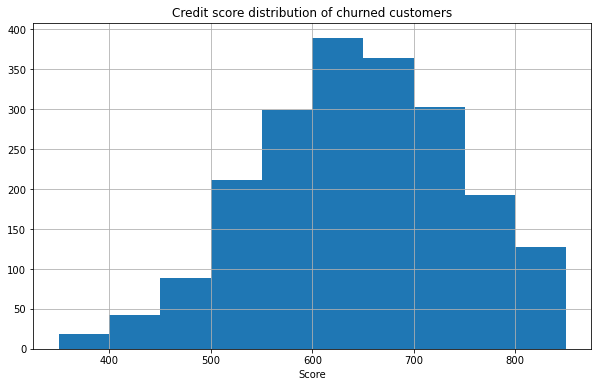

In [309]:
plt.figure(figsize=(10,6))
df_exited['Score'].hist()
plt.xlabel('Score')
plt.title('Credit score distribution of churned customers')

Most churned customers had a credit score between 600 and 650.

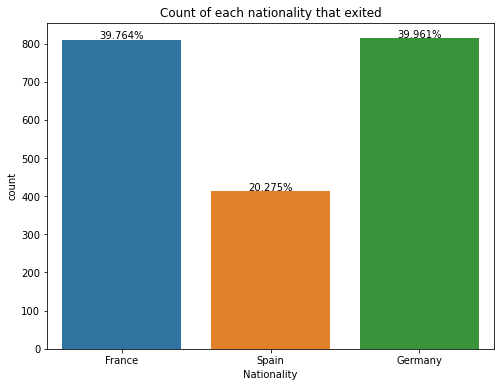

In [310]:
plt.figure(figsize=(8,6))
total=float(len(df_exited['Nationality']))
nat=sns.countplot(x='Nationality', data=df_exited)
for n in nat.patches:
    height=n.get_height()
    nat.text(n.get_x()+n.get_width()/2., height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of each nationality that exited')
plt.xlabel('Nationality')
plt.show()

Text(0.5, 1.0, 'Relationship between Age and Balance')

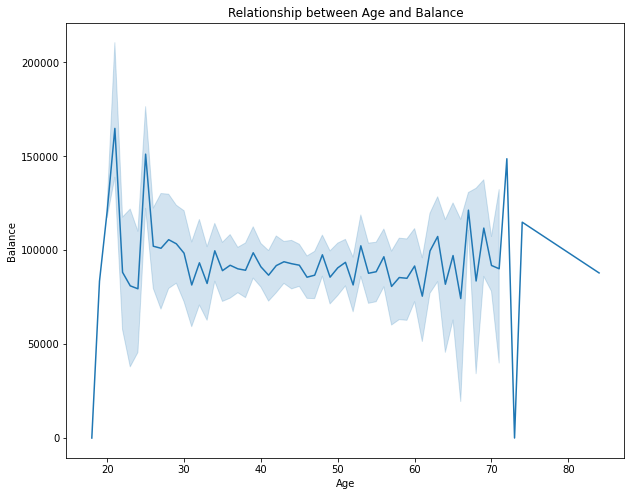

In [311]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_exited['Age'],y=df_exited['Balance']) 
plt.title('Relationship between Age and Balance')

In [312]:
df['Products'].unique()

array([1, 3, 2, 4], dtype=int64)

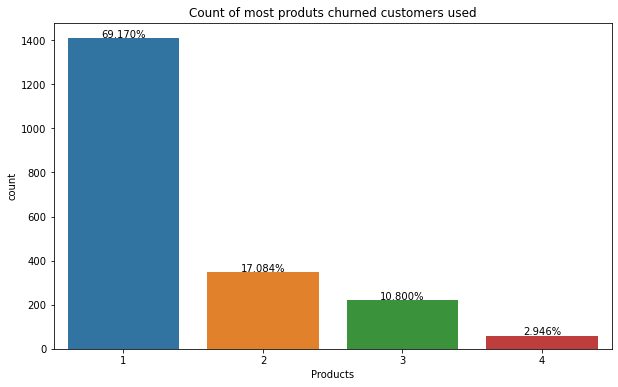

In [313]:
plt.figure(figsize=(10,6))
pod=sns.countplot(x='Products', data=df_exited)
for p in pod.patches:
    height=p.get_height()
    pod.text(p.get_x()+p.get_width()/2., height+3, '{:1.3f}%'.format((height/total)*100), ha='center')
plt.title('Count of most produts churned customers used')
plt.xlabel('Products')
plt.show()

__Model Building__

In [314]:
X=df.iloc[:, 3:-1].values
y=df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [315]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X=np.asarray(ct.fit_transform(X))
X[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [359]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
X_train, X_test, y_train, y_test= train_test_split(X,y)


In [317]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [343]:
dec=DecisionTreeClassifier()
svm=SVC(kernel='rbf')
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
knn=KNeighborsClassifier(n_neighbors=7)

In [344]:
dec.fit(X_train, y_train)
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
ad.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [358]:
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score

In [346]:
pred_rf=rfc.predict(X_test)
pred_dt=dec.predict(X_test)
pred_sv=svm.predict(X_test)
pred_ada=ad.predict(X_test)
pred_kn=knn.predict(X_test)

In [347]:
print(accuracy_score(y_test, pred_rf))
print(accuracy_score(y_test, pred_dt))
print(accuracy_score(y_test, pred_sv))
print(accuracy_score(y_test, pred_ada))
print(accuracy_score(y_test, pred_kn))

0.8652
0.8044
0.7972
0.8628
0.7696


The random forest classifier seems to have the highest accuracy. 

In [348]:
print(precision_score(y_test, pred_rf, pos_label=0))
print(precision_score(y_test, pred_dt, pos_label=0))
print(precision_score(y_test, pred_sv, pos_label=0))
print(precision_score(y_test, pred_ada, pos_label=0))
print(precision_score(y_test, pred_kn, pos_label=0))

0.8763636363636363
0.87865055387714
0.7972
0.883008356545961
0.7988190636862084


The adaboost model produces the highest precision score

In [349]:
print(recall_score(y_test, pred_rf, pos_label=0))
print(recall_score(y_test, pred_dt, pos_label=0))
print(recall_score(y_test, pred_sv, pos_label=0))
print(recall_score(y_test, pred_ada, pos_label=0))
print(recall_score(y_test, pred_kn, pos_label=0))

0.9673858504766684
0.8755644756648269
1.0
0.9543401906673357
0.9503261414952333


The SVM model produces a perfect recall score. We need to define a metric that would fit the model being produced. 
For this model, we are very much interested in how much of our predictions are correct. That is, out of the customers we predicted to leave, how many actually exited the service. This is computed using the precision score. 
We might also be interested in knowing how of the exited customers we correctly predicted, this is computed using the recall score. 
We can thus create an f beta score to accommodate both metrics. We would use a better of 0.3, since we are most interested in precision.                                                         

In [350]:
print('F-beta score for random forest:', fbeta_score(y_test, pred_rf, beta=0.3, pos_label=0))
print('F-beta score for decision tree:', fbeta_score(y_test, pred_dt, beta=0.3, pos_label=0))
print('F-beta score for SVM:', fbeta_score(y_test, pred_sv, beta=0.3, pos_label=0))
print('F-beta score for ada boost:', fbeta_score(y_test, pred_ada, beta=0.3, pos_label=0))
print('F-beta score for KNN:', fbeta_score(y_test, pred_kn, beta=0.3, pos_label=0))

F-beta score for random forest: 0.8832253915952544
F-beta score for decision tree: 0.8783949163422418
F-beta score for SVM: 0.8107764138584818
F-beta score for ada boost: 0.8884917522724644
F-beta score for KNN: 0.8094747036704479


The adaboost classifier has the best f beta score with the random forest classifier coming in a close second

__Hyperparameter Tuning__

Trying some hyperparameter tuning to see if we get better results.

In [341]:
p_grid={'n_estimators':[ 1, 10, 20, 50], 'max_depth':[1,2,10, 20]}
search=GridSearchCV(estimator=rfc, param_grid=p_grid)
search.fit(X_train,y_train)
rf_preds=search.best_estimator_
y_preds=rf_preds.predict(X_test)
print('F-beta score for random forest:', fbeta_score(y_test, y_preds, beta=0.3,pos_label=0 ))



F-beta score for random forest: 0.8809289215380586


In [366]:
p_grid={'n_estimators':[1, 10, 100], 'learning_rate':[0.01, 0.1, 1]}
search=GridSearchCV(estimator=ad, param_grid=p_grid)
search.fit(X_train,y_train)
ada_preds=search.best_estimator_
y_preds=ada_preds.predict(X_test)
print('F-beta score for adaboost:', fbeta_score(y_test, y_preds, beta=0.3,pos_label=0 ))

F-beta score for adaboost: 0.8702229132088157


In [351]:
p_grid={'C':[0.01, 0.1, 10, 100]}
search=GridSearchCV(estimator=svm, param_grid=p_grid)
search.fit(X_train,y_train)
svm_preds=search.best_estimator_
y_preds=svm_preds.predict(X_test)
print('F-beta score for SVM:', fbeta_score(y_test, y_preds, beta=0.3,pos_label=0 ))

F-beta score for SVM: 0.8107764138584818


Hyperparameter tuning does not seem to do much to model performance. Trying out a 10 fold cross validation technique for the adaboost classifier to see if it overfits.

In [363]:
f_scorer = make_scorer(fbeta_score, beta=0.3, pos_label=0)
for i in range(5):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(ada, X, y, scoring=f_scorer, cv=outer_cv)
    print(np.mean(scores))

0.8827674679954463
0.8817201973735941
0.8821247995545468
0.8815954675476473
0.8817292845803542


In [365]:
f_scorer = make_scorer(fbeta_score, beta=0.3, pos_label=0)
for i in range(5):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(rfc, X, y, scoring=f_scorer, cv=outer_cv)
    print(np.mean(scores))

0.8820551740854625
0.8823424838896761
0.8808078863245139
0.8819015677071407
0.8824574070746649


The adaboost classifier seems to be slightly overfitting unlike the random forest. It might be advisable to stick with the random forest model for this prediction.